In [492]:
import pandas as pd
import numpy as np

In [493]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, neighbors

def standardize(df):
    scaler = StandardScaler()
    standardized_data = scaler.fit_transform(df)
    df = pd.DataFrame(standardized_data, columns=df.columns)
    return df

In [494]:
#####1st step in preprocessing, convert string columns to int
df = pd.read_csv("life expectancy data.csv")
columns = df.columns
countries = df["Country"].unique()
country_ids = {}
status_ids = {"Developing": 0, "Developed": 1}

for idx, string in enumerate(countries):
    country_ids[string] = idx

df['Status'] = df['Status'].replace(status_ids)
df['Country'] = df['Country'].replace(country_ids)
df = df.dropna()

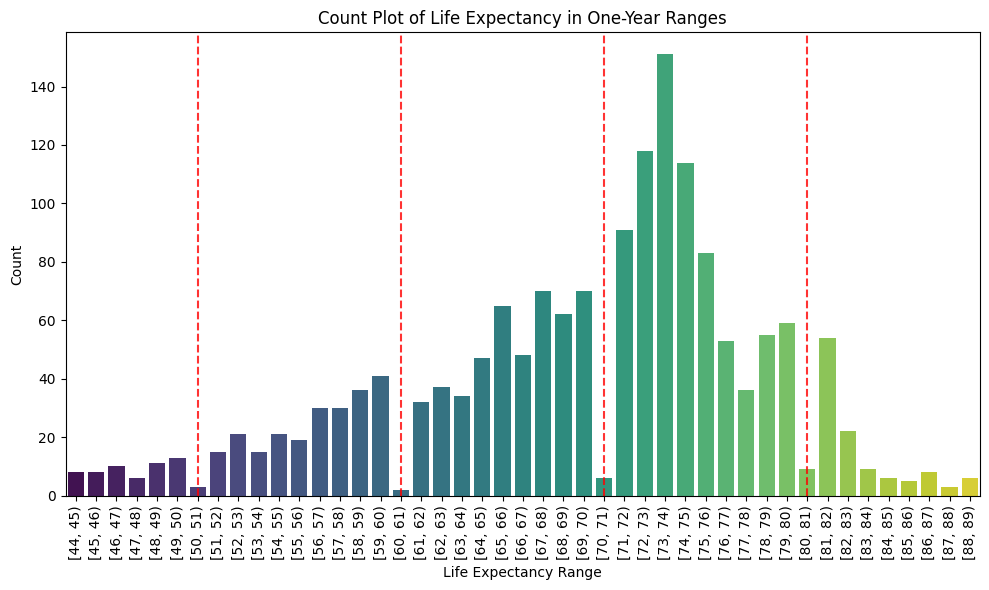

In [495]:
#Visualizing data for making age ranges
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

x= df["Life expectancy "]

ranges = range(int(x.min()), int(x.max()+1))

x = pd.cut(x, bins=ranges, right=False)

plt.figure(figsize=(10, 6))
sns.countplot(x=x, data=df, palette='viridis')
ax = sns.countplot(x=x, data=df, palette='viridis')
plt.xticks(rotation=90)  

for i in range(6,40,10):
    ax.axvline(i, color='red', linestyle='--', alpha=0.8)
    
plt.title('Count Plot of Life Expectancy in One-Year Ranges')
plt.xlabel('Life Expectancy Range')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


In [496]:
print(df.corr()['Life expectancy '])

Country                           -0.114434
Year                               0.050771
Status                             0.442798
Life expectancy                    1.000000
Adult Mortality                   -0.702523
infant deaths                     -0.169074
Alcohol                            0.402718
percentage expenditure             0.409631
Hepatitis B                        0.199935
Measles                           -0.068881
 BMI                               0.542042
under-five deaths                 -0.192265
Polio                              0.327294
Total expenditure                  0.174718
Diphtheria                         0.341331
 HIV/AIDS                         -0.592236
GDP                                0.441322
Population                        -0.022305
 thinness  1-19 years             -0.457838
 thinness 5-9 years               -0.457508
Income composition of resources    0.721083
Schooling                          0.727630
Name: Life expectancy , dtype: f

In [497]:
#Creating boundaries for category creation
very_short_boundary = 50
short_boundary = 60 
long_boundary = 70
very_long_boundary = 80

count1 = count2 = count3 = count4 = count5 = 0

for idx, row in df.iterrows():
    life_expectancy = int(row['Life expectancy '])
    if life_expectancy < very_short_boundary:
        df.at[idx, 'Life expectancy '] = "Very Short"
        count1 += 1
        
    elif life_expectancy > very_short_boundary and life_expectancy < short_boundary:
        df.at[idx,'Life expectancy '] = "Short"
        count2 += 1

    elif life_expectancy > long_boundary and life_expectancy < very_long_boundary:
        df.at[idx, 'Life expectancy '] = "Long"
        count3 += 1

    elif int(row['Life expectancy ']) > very_long_boundary:
        df.at[idx, 'Life expectancy '] = "Very Long"
        count4 += 1
        
    else:
        df.at[idx, 'Life expectancy '] = "Average"
        count5 += 1


In [498]:
######2nd step, Standardization
df = df.dropna()
y = df['Life expectancy ']
X = standardize(df.drop(["Life expectancy "],axis=1))

<Axes: xlabel='Life expectancy ', ylabel='count'>

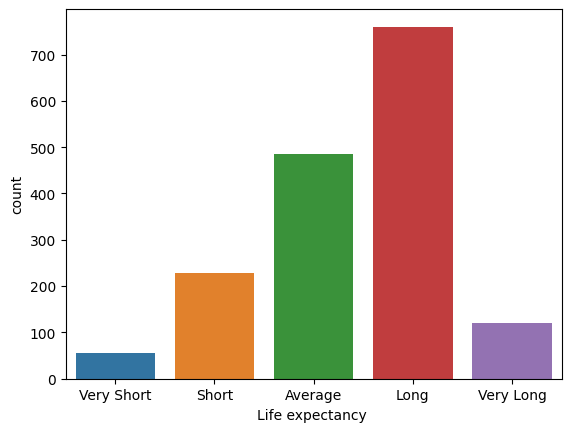

In [499]:
#Creates countplot in desired order
desired_order = ['Very Short', 'Short', 'Average', 'Long', 'Very Long']
sns.countplot(x=df['Life expectancy '], data=df, order=desired_order)

In [ ]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#For calculating model performance under different model parameters
accuracy_scores = []
f1_scores = []
k_values = []
best_neighbors = 1
neighbors = 100
X_train, X_tst, y_train, y_tst = train_test_split(X, y, test_size=.2, random_state=42)

for i in range(1,neighbors):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_tst)
    
   
    accuracy = float((predictions == y_tst).mean())
    accuracy_scores.append(accuracy)
        
    
    f1 = float(f1_score(predictions, y_tst, average="macro"))
    f1_scores.append(f1)
    k_values.append(i)

    print(f"{i} neighbors: ", accuracy)
    print("F1 Score:", f1)


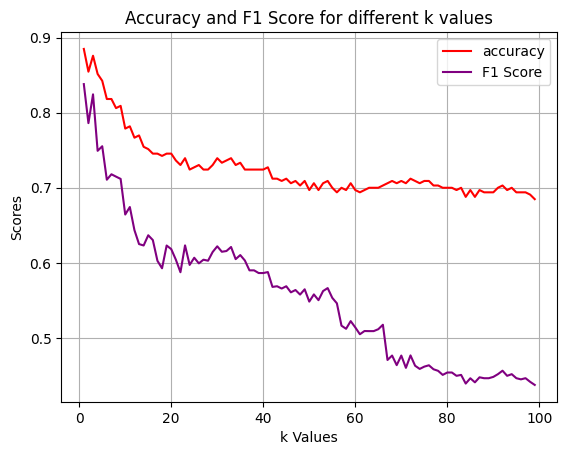

In [502]:
#Plot for model performance under different parameters
plt.plot(k_values, accuracy_scores, color='red', label='accuracy')
plt.plot(k_values, f1_scores, color='purple', label='F1 Score')

plt.xlabel('k Values')
plt.ylabel('Scores')
plt.title('Accuracy and F1 Score for different k values')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

In [503]:
#Fitting model with optimal neighbors
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
predictions = knn.predict(X_tst)
    
accuracy = (predictions == y_tst).mean()

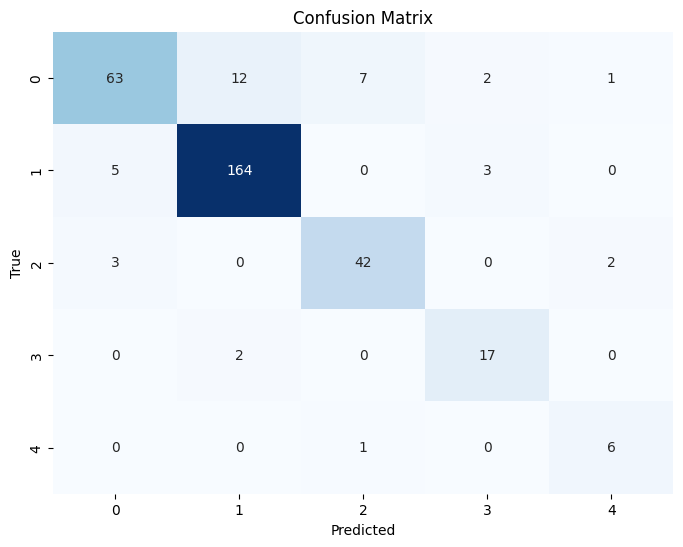

In [504]:
#Confusion matrix further evaluating the performance of the model
from sklearn.metrics import confusion_matrix
predictions = knn.predict(X_tst)

cm = confusion_matrix(y_tst, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()